<a href="https://colab.research.google.com/github/HammadN98/Pos-Inteligencia-Artificial-e-Computacional/blob/main/Aprendizado-de-maquina/ELT574_119826_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade de Progrmacao 2

Nimer Hammad 119826

1. Utilize o notebook disponibilizado para o problema de classificação multiclasse Fashion MNIST e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 90% de acurácia nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

##Obs: Criei um notebook novo para fugir da poluicao de todo aquele notebook disponibilizado. Logo so pegarei os codigos importantes dele, e alterarei os hyperparametros como o exercicio pede.

## Disponibilizado em Aula

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [36]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f"Dados de Treino: {X_train_full.shape, y_train_full.shape}")
print(f"Dados de Teste: {X_test.shape, y_test.shape}")

Dados de Treino: ((60000, 28, 28), (60000,))
Dados de Teste: ((10000, 28, 28), (10000,))


In [37]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

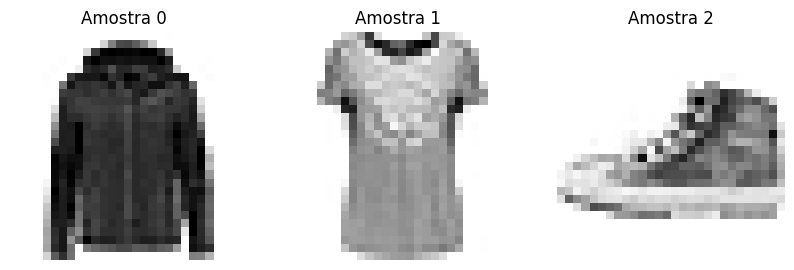

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Coat


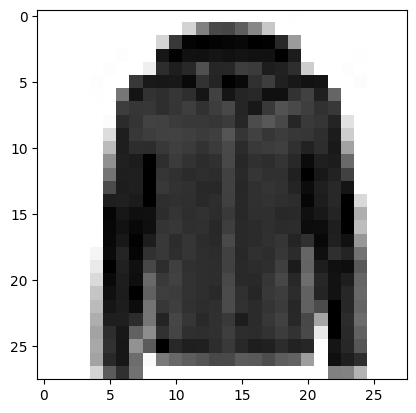

In [39]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary");

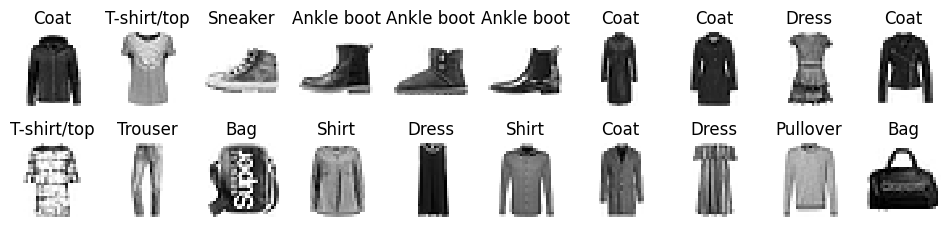

In [40]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [41]:
model_aula = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

In [42]:
model_aula.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_aula.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_31, built=True>,
 <Dense name=dense_32, built=True>,
 <Dense name=dense_33, built=True>]

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [44]:
hidden1 = model_aula.layers[1]
hidden1

<Dense name=dense_31, built=True>

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [45]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03112663, -0.06844862, -0.02522704, ..., -0.01333553,
         0.00440722, -0.06647046],
       [-0.05121817, -0.06180017,  0.01544632, ..., -0.05335522,
        -0.04726994,  0.05017759],
       [-0.04981263, -0.03917641,  0.04191508, ...,  0.04581436,
        -0.0180069 , -0.06601717],
       ...,
       [-0.06150243, -0.01350888, -0.07107017, ...,  0.03426077,
         0.01568067, -0.06684448],
       [ 0.03938422,  0.04064295,  0.06418459, ..., -0.05459841,
        -0.05780862,  0.02204232],
       [ 0.00156593,  0.0725594 , -0.03507329, ...,  0.04881491,
         0.04743934, -0.00788733]], dtype=float32)

In [46]:
weights.shape

(784, 300)

In [47]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [48]:
model_aula.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

### Treinando o modelo

In [49]:
history_aula = model_aula.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6889 - loss: 1.0096 - val_accuracy: 0.8202 - val_loss: 0.5360
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8238 - loss: 0.5012 - val_accuracy: 0.8482 - val_loss: 0.4455
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8389 - loss: 0.4550 - val_accuracy: 0.8624 - val_loss: 0.4123
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8513 - loss: 0.4237 - val_accuracy: 0.8676 - val_loss: 0.3982
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8585 - loss: 0.3986 - val_accuracy: 0.8688 - val_loss: 0.3832
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8620 - loss: 0.3832 - val_accuracy: 0.8740 - val_loss: 0.3713
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8681 - loss: 0.3683 - val_accuracy: 0.8784 - val_loss: 0.3577
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8727 - loss: 0.36

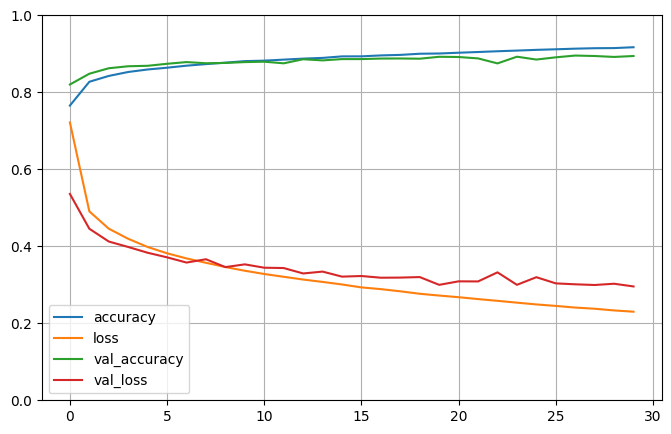

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history_aula.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
model_aula.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8810 - loss: 0.3380


[0.33183571696281433, 0.8830000162124634]

In [52]:
from sklearn.metrics import confusion_matrix
y_pred = model_aula.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[875,   4,  20,  15,   3,   1,  72,   0,  10,   0],
       [  2, 973,   1,  19,   2,   0,   3,   0,   0,   0],
       [ 21,   1, 818,  10,  83,   1,  60,   1,   5,   0],
       [ 29,  14,  23, 859,  42,   1,  27,   0,   5,   0],
       [  2,   1,  99,  20, 819,   0,  53,   0,   6,   0],
       [  0,   0,   0,   1,   0, 968,   0,  19,   2,  10],
       [163,   1,  95,  21,  58,   0, 652,   0,  10,   0],
       [  0,   0,   0,   0,   0,  25,   0, 958,   1,  16],
       [ 12,   0,   5,   3,   5,   4,   3,   6, 962,   0],
       [  1,   0,   0,   0,   0,  15,   0,  38,   0, 946]])

## Resolucao

In [53]:
model_resposta_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


model_resposta_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
history_resposta_1 = model_resposta_1.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                     validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6927 - loss: 0.8779 - val_accuracy: 0.8530 - val_loss: 0.4174
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8255 - loss: 0.4851 - val_accuracy: 0.8696 - val_loss: 0.3638
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8462 - loss: 0.4322 - val_accuracy: 0.8634 - val_loss: 0.3602
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8541 - loss: 0.4040 - val_accuracy: 0.8722 - val_loss: 0.3510
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8568 - loss: 0.3921 - val_accuracy: 0.8698 - val_loss: 0.3630
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8589 - loss: 0.3841 - val_accuracy: 0.8820 - val_loss: 0.3356
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8674 - loss: 0.3695 - val_accuracy: 0.8784 - val_loss: 0.3312
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8660 - loss: 0

In [55]:
test_loss, test_accuracy = model_resposta_1.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3433
Acurácia no conjunto de teste: 87.84%


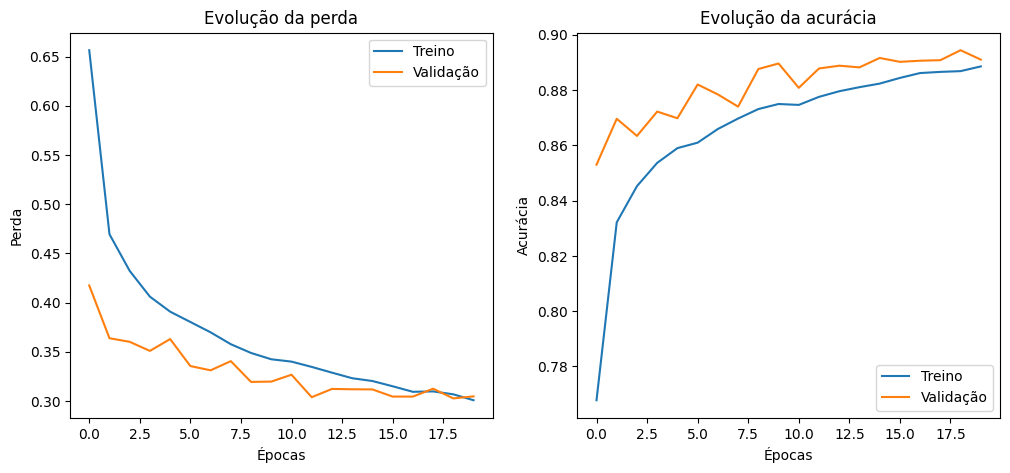

In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resposta_1.history['loss'], label='Treino')
plt.plot(history_resposta_1.history['val_loss'], label='Validação')
plt.title('Evolução da perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resposta_1.history['accuracy'], label='Treino')
plt.plot(history_resposta_1.history['val_accuracy'], label='Validação')
plt.title('Evolução da acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


In [57]:
from tensorflow.keras.callbacks import EarlyStopping


model_resposta_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


early_stopping = EarlyStopping(monitor='val_loss', patience=3)
optimizer = Adam(learning_rate=0.001)

model_resposta_2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_resposta_2 = model_resposta_2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6774 - loss: 0.9140 - val_accuracy: 0.8456 - val_loss: 0.4375
Epoch 2/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8250 - loss: 0.4906 - val_accuracy: 0.8486 - val_loss: 0.4074
Epoch 3/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8420 - loss: 0.4427 - val_accuracy: 0.8613 - val_loss: 0.3837
Epoch 4/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8430 - loss: 0.4302 - val_accuracy: 0.8623 - val_loss: 0.3758
Epoch 5/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8559 - loss: 0.4033 - val_accuracy: 0.8655 - val_loss: 0.3721
Epoch 6/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8600 - loss: 0.3882 - val_accuracy: 0.8709 - val_loss: 0.3571
Epoch 7/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8625 - loss: 0.3757 - val_accuracy: 0.8680 - val_loss: 0.3558
Epoch 8/20
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8681 - loss: 0.3620

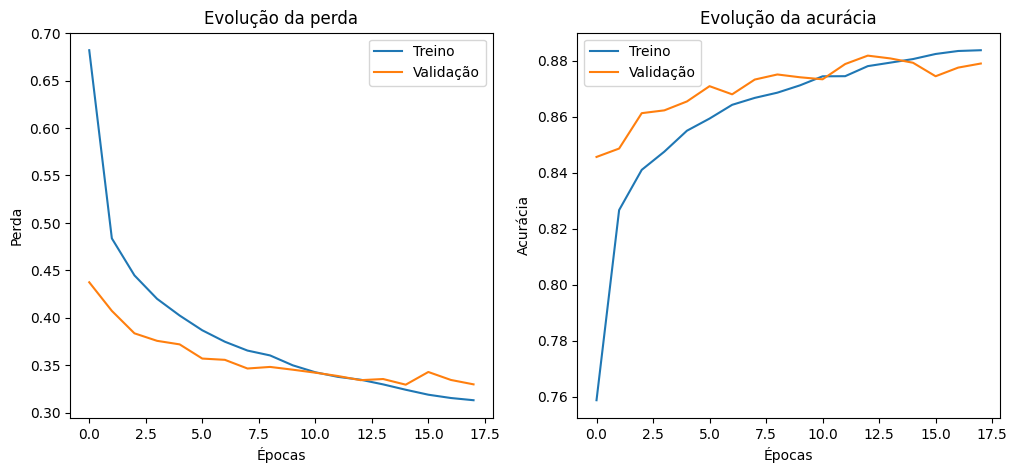

In [58]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resposta_2.history['loss'], label='Treino')
plt.plot(history_resposta_2.history['val_loss'], label='Validação')
plt.title('Evolução da perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_resposta_2.history['accuracy'], label='Treino')
plt.plot(history_resposta_2.history['val_accuracy'], label='Validação')
plt.title('Evolução da acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


## Solucao 2

In [59]:
model_resposta_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),  #Diminuido para acentuar a perca de informacao do dropout
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'), ##Add para nao mudar subtamente de 64 para 10, e perder boas informacoes
    Dense(10, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=5) #Aumentado o nivel de paciencia
optimizer = Adam(learning_rate=0.001)

model_resposta_3.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_resposta_3 = model_resposta_3.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,  #Aumentado o valor do batch
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6571 - loss: 0.9661 - val_accuracy: 0.8258 - val_loss: 0.4686
Epoch 2/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8302 - loss: 0.4670 - val_accuracy: 0.8541 - val_loss: 0.4001
Epoch 3/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8488 - loss: 0.4149 - val_accuracy: 0.8587 - val_loss: 0.3879
Epoch 4/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8588 - loss: 0.3858 - val_accuracy: 0.8676 - val_loss: 0.3688
Epoch 5/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8658 - loss: 0.3660 - val_accuracy: 0.8706 - val_loss: 0.3620
Epoch 6/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8691 - loss: 0.3536 - val_accuracy: 0.8727 - val_loss: 0.3506
Epoch 7/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8720 - loss: 0.3527 - val_accuracy: 0.8745 - val_loss: 0.3463
Epoch 8/30
688/688 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8804 - loss: 0.3332 - val_accuracy: 0.

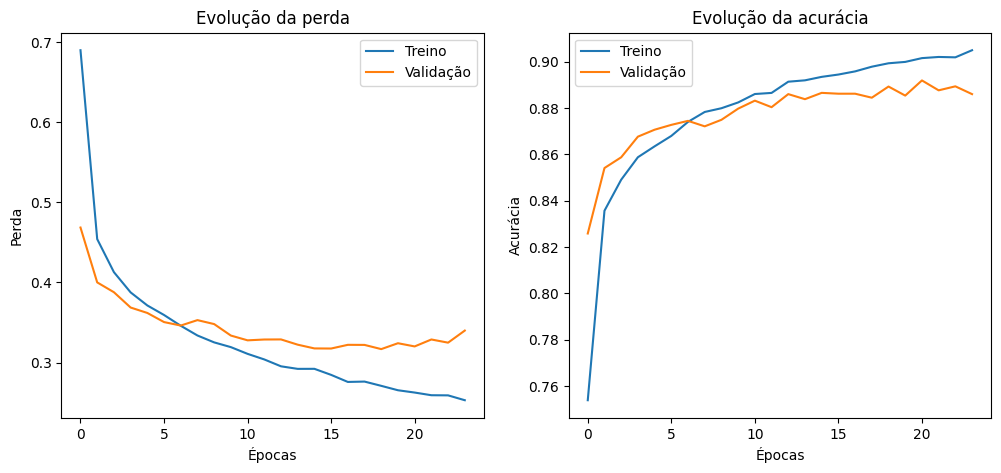

In [61]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resposta_3.history['loss'], label='Treino')
plt.plot(history_resposta_3.history['val_loss'], label='Validação')
plt.title('Evolução da perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history_resposta_3.history['accuracy'], label='Treino')
plt.plot(history_resposta_3.history['val_accuracy'], label='Validação')
plt.title('Evolução da acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()